#Enunciados dos Trabalhos para Casa (TPC)
da UC de **Processamento de Linguagens**,
ano Letivo 2022/23 , 3º ano de LEI

Relativos à 1º parte do programa: Filtros de Texto baseados em ER
**texto em negrito**

# TPC1: Análise de dados: doença cardíaca
(publicado em **2023.02.14**)

Descarregue o ficheiro de dados: `myheart.csv`
Crie um programa em Python, conjunto de funções, que responda às seguintes questões:
* Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;
* Pense num modelo para guardar uma distribuição;
* Crie uma função que calcula a distribuição da doença por sexo;
* Crie uma função que calcula a distribuição da doença por escalões etários. Considere os seguintes escalões: [30-34], [35-39], [40-44], ...
* Crie uma função que calcula a distribuição da doença por níveis de colesterol. Considere um nível igual a um intervalo de 10 unidades, comece no limite inferior e crie os níveis necessários até abranger o limite superior;
* Crie uma função que imprime na forma de uma tabela uma distribuição;
* Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas;
* Extra: explore o módulo matplotlib e crie gráficos para as suas distribuições.

# Exercício 1


In [2]:
def readfile():
  model = dict()
  idx = 0
  file = open("myheart.csv")
  for line in file.readlines():
    if idx != 0:
      model[idx-1] = line.strip()
    idx+=1
  return model

print(readfile())

def total():
    return len(readfile().values())

{0: '40,M,140,289,172,0', 1: '49,F,160,180,156,1', 2: '37,M,130,283,98,0', 3: '48,F,138,214,108,1', 4: '54,M,150,195,122,0', 5: '39,M,120,339,170,0', 6: '45,F,130,237,170,0', 7: '54,M,110,208,142,0', 8: '37,M,140,207,130,1', 9: '48,F,120,284,120,0', 10: '37,F,130,211,142,0', 11: '58,M,136,164,99,1', 12: '39,M,120,204,145,0', 13: '49,M,140,234,140,1', 14: '42,F,115,211,137,0', 15: '54,F,120,273,150,0', 16: '38,M,110,196,166,1', 17: '43,F,120,201,165,0', 18: '60,M,100,248,125,1', 19: '36,M,120,267,160,1', 20: '43,F,100,223,142,0', 21: '44,M,120,184,142,0', 22: '49,F,124,201,164,0', 23: '44,M,150,288,150,1', 24: '40,M,130,215,138,0', 25: '36,M,130,209,178,0', 26: '53,M,124,260,112,0', 27: '52,M,120,284,118,0', 28: '53,F,113,468,127,0', 29: '51,M,125,188,145,0', 30: '53,M,145,518,130,1', 31: '56,M,130,167,114,0', 32: '54,M,125,224,122,1', 33: '41,M,130,172,130,1', 34: '43,F,150,186,154,0', 35: '32,M,125,254,155,0', 36: '65,M,140,306,87,1', 37: '41,F,110,250,142,0', 38: '48,F,120,177,148,0'

# Exercício 2


In [49]:
def distribution_by_tensao () :  
  hash = readfile()
  res = dict()
  final = dict()
  for value in hash.values() : 
    v = value.split(",")
    lim_inf = int(v[0]) - (int(v[0])%10)
    lim_sup = lim_inf + 9
    k = str(lim_inf) + " - " + str(lim_sup)
    if k not in res.keys() : 
      lista = list()
      lista.append(v[4])
      res[k] = lista
    else : 
      res[k].append(v[4])
  
  for key,value_2 in res.items() : 
    total = 0 
    for tensao in value_2 :
      total += int(tensao)
    novo_value = total/len(value_2)
    final[key] = novo_value 

  
  return dict(sorted(final.items()))


print(distribution_by_tensao())

{'20 - 29': 179.25, '30 - 39': 155.04285714285714, '40 - 49': 144.73333333333332, '50 - 59': 133.15, '60 - 69': 125.205, '70 - 79': 119.1}


# Exercício 3


In [5]:
def distributionbygender()  :
  intfem = 0
  intfemdoente = 0 
  intmas = 0 
  intmasdoente = 0
  hash = dict()
  hash = readfile()
  res = dict()
  for value in hash.values():
    sexo = value.split(',')[1]
    doente = value.split(',')[5]
    if (sexo == 'M' or sexo == 'm') :
      intmas+=1
      if (int(doente) == 1) : 
        intmasdoente += 1
    elif (sexo == 'F' or sexo == 'f') :
      intfem+=1
      if (int(doente) == 1) : 
        intfemdoente += 1
  res['M'] = intmas
  res['MD'] = intmasdoente
  res['F'] = (intfem)
  res['FD'] = (intfemdoente)

  return res


res = dict()
res = distributionbygender()
print(f"doentes masculino: {res['MD']} / {res['M']}")
print(f"doentes feminino: {res['FD']} / {res['F']}")
print(f"doentes: {res ['MD'] + res['FD']} / {res['M']+res['F']} ")

doentes masculino: 428 / 670
doentes feminino: 40 / 169
doentes: 468 / 839 


# Exercício 4

In [6]:
def distribution_by_age_group():
  hash = readfile()
  grupo =  dict()
  for value in hash.values() : 
    v = value.split(',')
    lim_inf = int(v[0]) - (int(v[0])%5)
    lim_sup = lim_inf + 4
    k = str(lim_inf) + " - " + str(lim_sup)
    if k not in grupo.keys() : 
      grupo[k] = 1
    else : 
      grupo[k] = grupo.get(k) + 1
  
  return dict(sorted(grupo.items()))

print(distribution_by_age_group())

{'25 - 29': 4, '30 - 34': 17, '35 - 39': 53, '40 - 44': 88, '45 - 49': 107, '50 - 54': 168, '55 - 59': 172, '60 - 64': 135, '65 - 69': 65, '70 - 74': 23, '75 - 79': 7}


# Exercício 5


In [7]:
def distribution_by_colesterol():
    hash = readfile()
    colesterol = dict()
    for values in hash.values():
        v = values.split(',')
        k = int(v[3])
        if k not in colesterol.keys():
            colesterol[k] = 1
        else:
            colesterol[k] = colesterol.get(k) + 1
    return dict(sorted(colesterol.items()))

print(distribution_by_colesterol())

{0: 172, 85: 1, 100: 2, 110: 1, 113: 1, 117: 1, 123: 1, 126: 2, 129: 1, 132: 1, 139: 2, 141: 1, 142: 1, 147: 2, 149: 2, 152: 1, 153: 1, 156: 1, 159: 1, 160: 6, 161: 2, 163: 2, 164: 1, 165: 1, 166: 4, 167: 3, 168: 2, 169: 1, 170: 2, 171: 3, 172: 2, 173: 2, 174: 1, 175: 2, 177: 5, 178: 1, 179: 2, 180: 3, 181: 2, 182: 5, 184: 4, 185: 2, 186: 5, 187: 1, 188: 3, 190: 2, 192: 2, 193: 5, 194: 2, 195: 7, 196: 6, 197: 5, 198: 6, 199: 2, 200: 4, 201: 6, 202: 3, 203: 5, 204: 7, 205: 2, 206: 2, 207: 6, 208: 7, 209: 5, 210: 4, 211: 9, 212: 4, 213: 7, 214: 7, 215: 6, 216: 8, 217: 4, 218: 6, 219: 6, 220: 8, 221: 4, 222: 6, 223: 9, 224: 6, 225: 6, 226: 6, 227: 3, 228: 5, 229: 3, 230: 9, 231: 4, 232: 2, 233: 6, 234: 6, 235: 5, 236: 5, 237: 6, 238: 4, 239: 4, 240: 7, 241: 3, 242: 2, 243: 6, 244: 4, 245: 6, 246: 8, 247: 1, 248: 5, 249: 5, 250: 5, 251: 1, 252: 3, 253: 2, 254: 11, 255: 2, 256: 5, 257: 2, 258: 7, 259: 2, 260: 7, 261: 3, 262: 1, 263: 6, 264: 4, 265: 4, 266: 3, 267: 5, 268: 4, 269: 5, 270: 6,

# Exercício 6

In [23]:
def dict_to_table(my_dict:dict):

  print("-"*15)
  for k in my_dict.keys(): 
    print(f"| {str(k)} | {str(my_dict[k])} {' ':4}|")
  print("-"*15)

    
    

dict_to_table(distributionbygender())

---------------
| M | 670     |
| MD | 428     |
| F | 169     |
| FD | 40     |
---------------


# Exercício 7

In [50]:
def imprime_dist() :
  dict_to_table(distributionbygender())
  dict_to_table(distribution_by_age_group())
  dict_to_table(distribution_by_colesterol())

imprime_dist()


---------------
| M | 670     |
| MD | 428     |
| F | 169     |
| FD | 40     |
---------------
---------------
| 25 - 29 | 4     |
| 30 - 34 | 17     |
| 35 - 39 | 53     |
| 40 - 44 | 88     |
| 45 - 49 | 107     |
| 50 - 54 | 168     |
| 55 - 59 | 172     |
| 60 - 64 | 135     |
| 65 - 69 | 65     |
| 70 - 74 | 23     |
| 75 - 79 | 7     |
---------------
---------------
| 0 | 172     |
| 85 | 1     |
| 100 | 2     |
| 110 | 1     |
| 113 | 1     |
| 117 | 1     |
| 123 | 1     |
| 126 | 2     |
| 129 | 1     |
| 132 | 1     |
| 139 | 2     |
| 141 | 1     |
| 142 | 1     |
| 147 | 2     |
| 149 | 2     |
| 152 | 1     |
| 153 | 1     |
| 156 | 1     |
| 159 | 1     |
| 160 | 6     |
| 161 | 2     |
| 163 | 2     |
| 164 | 1     |
| 165 | 1     |
| 166 | 4     |
| 167 | 3     |
| 168 | 2     |
| 169 | 1     |
| 170 | 2     |
| 171 | 3     |
| 172 | 2     |
| 173 | 2     |
| 174 | 1     |
| 175 | 2     |
| 177 | 5     |
| 178 | 1     |
| 179 | 2     |
| 180 | 3     |
| 181 | 2     |

# Exercício 8


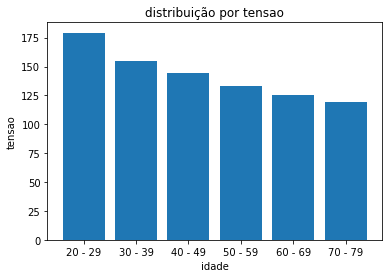

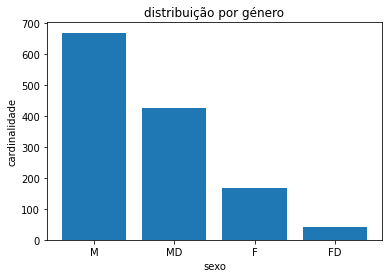

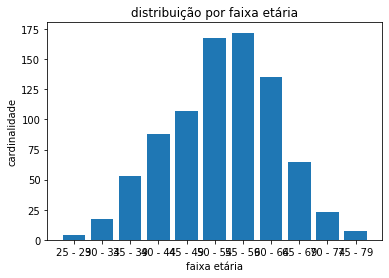

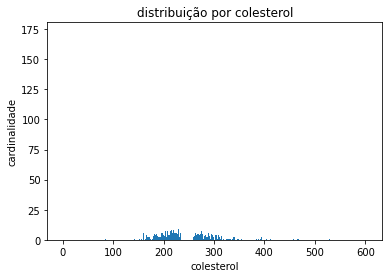

In [51]:
import matplotlib.pyplot as plt;

def distribution_graph():
    tensao = distribution_by_tensao()
    gender = distributionbygender()
    age_group = distribution_by_age_group()
    colesterol = distribution_by_colesterol()
    
    _, ax = plt.subplots()
    ax.bar(tensao.keys(), tensao.values())
    ax.set_title('distribuição por tensao')
    ax.set_xlabel("idade")
    ax.set_ylabel('tensao')
    plt.show()
    
    _, bx = plt.subplots()
    bx.bar(gender.keys(),gender.values())
    bx.set_title('distribuição por género')
    bx.set_xlabel("sexo")
    bx.set_ylabel('cardinalidade')
    plt.show()

    _, cx = plt.subplots()
    cx.bar(age_group.keys(), age_group.values())
    cx.set_title('distribuição por faixa etária')
    cx.set_xlabel("faixa etária")
    cx.set_ylabel('cardinalidade')
    plt.show()

    _, dx = plt.subplots()
    dx.bar(colesterol.keys(), colesterol.values())
    dx.set_title('distribuição por colesterol')
    dx.set_xlabel("colesterol")
    dx.set_ylabel('cardinalidade')

    plt.show()
    
distribution_graph()